In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_excel("ENB2012_data.xlsx")


In [33]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [34]:
#rename column names
column_names = { "X1": "Relative_Compactness", "X2": "Surface_Area","X3": "Wall_Area","X4": "Roof_Area",
                "X5": "Overall_Height","X6": "Orientation","X7": "Glazing_Area","X8": "Glazing_Area_Distribution",
                "y1": "Heating_Load", "y2": "Cooling_Load" }

data = data.rename(columns = column_names)


In [5]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [35]:
data.rename(columns = {"Y1":"Heating_Load", "Y2":"Cooling_Load"}, inplace=True)

In [7]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [36]:
#grabbing a sample of the data for LR

sample_data_SLR = data[["Relative_Compactness", "Cooling_Load"]].sample(n = 20, random_state = 2)


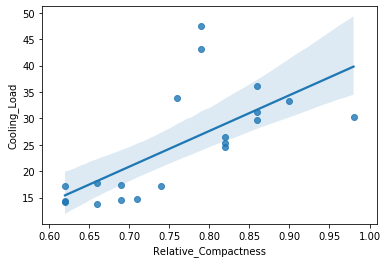

In [37]:
#regplot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data= sample_data_SLR)


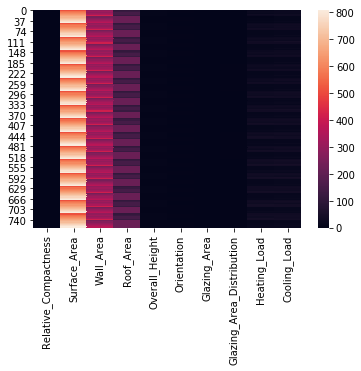

In [63]:
sns.heatmap(data)

In [10]:
#assumptions of Linear regression

#Linearity
#Homoscedasticity
#normality
#Independence of observation


In [38]:
#normalize dataset to a uniform scale using MinMaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#seperating features from target
features_df = transformed_df.drop(columns =["Heating_Load", "Cooling_Load"])
target_df = transformed_df["Heating_Load"]


In [39]:
#split dataset into training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state=1)

In [40]:
#creating the model, training and testing on test_size
from sklearn.linear_model import LinearRegression
#creating an object of the linear regresor
regressor = LinearRegression()
#training the regressor
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)


In [41]:
#calculating the mean absolute error-MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)

round(MAE, 3)

0.063

In [42]:
#calculating the residual sum of squares-RSS
RSS = np.sum(np.square(y_test - y_pred))
round(RSS, 3)

1.817

In [43]:
#calculating the root mean squared error-RMSE
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
round(RMSE, 3)

0.089

In [44]:
#calculating r2_score
from sklearn.metrics import r2_score
linear_2_score = r2_score(y_test, y_pred)
round(linear_2_score, 3)



0.894

In [45]:
#handling underfitting and overfitting
# L2(Ridge Regression) regularization

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
ridge_y_pred = ridge_reg.predict(X_test)
#ridge_y_pred

In [48]:
#calculating r2_score for ridge reg
ridge_r2 = r2_score(y_test, ridge_y_pred)
round(ridge_r2, 3)

0.892

In [49]:
#feature selection and lasso regression
#LASSO - Least Absolute Shrinkage and Selector Operator
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
#lasso_y_pred 
lasso_y_pred = lasso_reg.predict(X_test)

In [52]:
#calculating r2 for lasso reg
lasso_r2 = r2_score(y_test, lasso_y_pred)
round(lasso_r2, 3)

0.888

In [55]:
#elasticNet regression
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha= 0.5)
elastic_reg.fit(X_train, y_train)
#elastic_y_pred
elastic_y_pred = elastic_reg.predict(X_test)
#calculating r2 for elasticreg model
elastic_r2 = r2_score(y_test, elastic_y_pred)
round(elastic_r2, 3)

-0.017

In [58]:
#comparing the effects of regularization

def get_weights_df(model, features, col_name):
    #getting the weights of each model
    weights = pd.Series(model.coef_, features.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(4)
    return weights_df

linear_model_weights = get_weights_df(regressor, X_train, "Linear_Model_weights")
ridge_model_weights = get_weights_df(ridge_reg, X_train, "Ridge_Model_Weights")
lasso_model_weights = get_weights_df(lasso_reg, X_train, "Lasso_Model_Weights")
elastic_model_weights = get_weights_df(elastic_reg, X_train, "Elastic_Model_Weights")

final_weights = pd.merge(linear_model_weights, ridge_model_weights, on="Features")
final_weights = pd.merge(final_weights, lasso_model_weights, on="Features")
final_weights = pd.merge(final_weights, elastic_model_weights, on="Features")

In [59]:
final_weights

,Features,Linear_Model_weights,Ridge_Model_Weights,Lasso_Model_Weights,Elastic_Model_Weights
0,Relative_Compactness,-0.606412,-0.283471,-0.027719,0.0
1,Roof_Area,-0.328099,-0.163192,-0.000000,-0.0
2,Surface_Area,-0.235022,-0.062275,0.000000,-0.0
3,Orientation,0.003399,0.003369,0.000000,-0.0
4,Wall_Area,0.018947,0.103061,0.200087,0.0
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431,0.0
6,Glazing_Area,0.215042,0.212449,0.206132,0.0
7,Overall_Height,0.393549,0.442467,0.463482,0.0
